### This project will be predicting that whether the patient has diabetes or not on the basis of the features.
##### The diabatics dataset has been collected from Kaggle.

### Work Flow
#### Diabatics Data --> Data Preprocessing ---> Train Test split ---> Machine Learning Method
### Check: Diabatics or not by setting New data ----> Trained Machine learing classifier

#### Import the Dependencies/ Libraries

In [145]:
# Import the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model selecttion: Support vector Machine
from sklearn import svm
from sklearn.metrics import accuracy_score

#### Data collection and test

In [146]:
# Loading the dataset:
data = pd.read_csv("diabetes.csv")

# First 5 rows of this dataFrame
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [147]:
# number of rows and columns in this dataset
data.shape

(768, 9)

#### Care of Missing values

In [148]:
data.isnull().head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [149]:
# define the null value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Taking care of Duplicate Values 

In [150]:
# Check the duplicate value
data_dup = data.duplicated().any()
data_dup

False

#### Statistics of this Dataset:


In [151]:
# getting the statistical measures of this dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Prepocessing: Data Processing

In [152]:
# Count the categorical value and numerical value
cate_val =[]
cont_val =[]

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column) 

In [153]:
# Categorical columns
cate_val

['Outcome']

In [154]:
# numerical columns
cont_val

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [155]:
# count the Categorical values
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### 0 -----> Non Diabets
#### 1------> Diabets

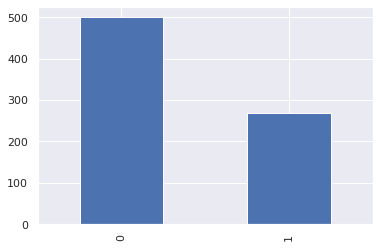

In [156]:
# plot
data.Outcome.value_counts().plot(kind="bar")

In [157]:
# mean of the features using groupby
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Correlation between all the features before cleaning

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

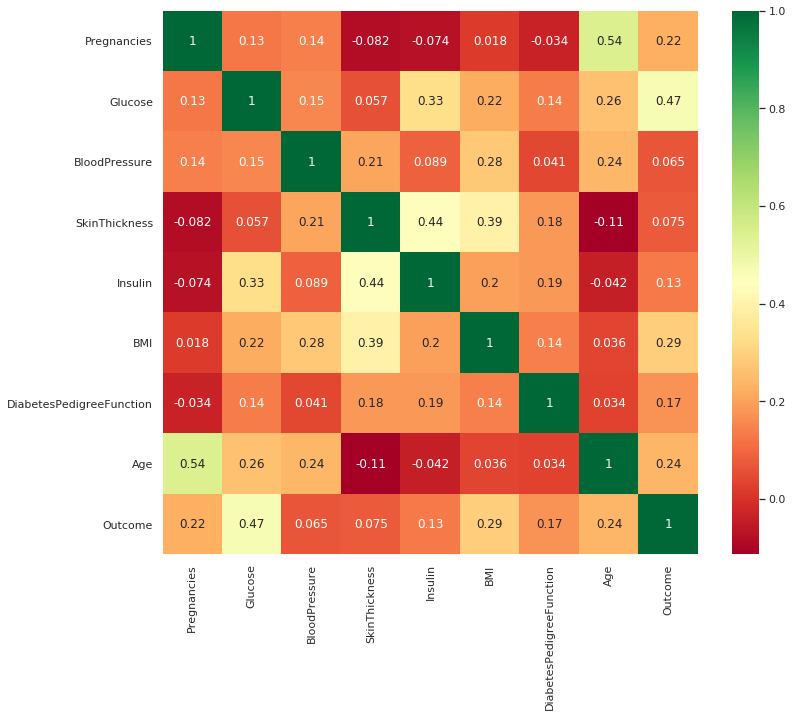

In [159]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

#### Feature scaling ----> Data Standerdzation

In [160]:
scaler = StandardScaler()
data[cont_val] = scaler.fit_transform(data[cont_val])

data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


#### Spiliting the dataset inti the Training set and test set

In [161]:
# Dependent variables
X = data.drop('Outcome', axis=1)
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [162]:
# Independent variables
y = data['Outcome']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [163]:
# split the dataset
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=0.2, random_state=42)

X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.547919,-1.154694,-3.572597,-1.288212,-0.692891,-4.060474,-0.507006,-1.041549
618,1.530847,-0.278373,0.666618,0.217261,-0.692891,-0.481351,2.446670,1.425995
346,-0.844885,0.566649,-1.194501,-0.096379,0.027790,-0.417892,0.550035,-0.956462
294,-1.141852,1.255187,-0.987710,-1.288212,-0.692891,-1.280942,-0.658012,2.702312
231,0.639947,0.410164,0.563223,1.032726,2.519781,1.803195,-0.706334,1.085644


In [164]:
# y train
y_train.head(5)

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [165]:
# X test
X_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.639947,-0.716533,-0.574128,0.781814,0.956860,0.254780,-0.126471,0.830381
324,-0.547919,-0.278373,0.304734,0.719086,-0.692891,0.470543,-0.978145,-1.041549
624,-0.547919,-0.403562,-0.263941,-1.288212,-0.692891,-0.151361,-0.947944,-1.041549
690,1.233880,-0.434859,0.563223,-1.288212,-0.692891,-0.938260,1.160099,0.064591
473,0.936914,0.472758,1.080200,-1.288212,-0.692891,-0.265588,-0.790898,1.425995


In [166]:
# y test
y_test.head(5)

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

### Support vector classifier (SVC)

In [167]:
# support vector machne
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [168]:
#predict
y_pred_svc = svm.predict(X_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [169]:
# Accuracy test by SVC
accuracy_score(y_test, y_pred_svc)

0.7337662337662337

### KNeighbors Classifiers

In [170]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [171]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [172]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [173]:
# accuracy test for KNeighbors Classifiers
accuracy_score(y_test, y_pred_knn)

0.7012987012987013

### Classification report and confusion matrix of the Support vector classifier model

In [177]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))

[[82 17]
 [24 31]]
             precision    recall  f1-score   support

          0       0.77      0.83      0.80        99
          1       0.65      0.56      0.60        55

avg / total       0.73      0.73      0.73       154



### Prediction on New data

In [174]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':148,
    'BloodPressure':72,
    'SkinThickness':35,
    'Insulin': 0,
    'BMI':33.6,
    'DiabetesPedigreeFunction':0.627,
    'Age':50,
    }, index=[0])

In [175]:
# Lets see new data
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [176]:
# Now check:
p = svm.predict(new_data)
if p[0] == 0:
    print("NO Diabets")
else:
    print("Diabets")   

NO Diabets


### Thus project design by Khalid Hossen, MSc(thesis), Scientific Computing, Memorial University, Canada.